Time Domain Implementation of Wiener Filter 

In [96]:
# Importing the necessary libraries
import numpy as np
from scipy.linalg import toeplitz
from scipy.signal import lfilter
import matplotlib.pyplot as plt

In [97]:
# Signal restoration using Wiener Filtering
fs = 100        #Sampling Frequency
t = np.arange(0, 1 + 1 / fs, 1 / fs)       #Time vector
f1 = 5      # Signal Frequency
s = np.sin(2 * np.pi * f1 * t)
Ns = len(s)

In [98]:
# Generation of noise v(n)
v = np.random.randn(Ns) / 10

# Observed Signal
x = s + v

In [99]:
# Filter Characteristics
Nh = 9  #Length of the filter
rxx =  np.correlate(x, x, mode = 'full')
rxx = rxx[Ns - 1 : Ns - 1 + Nh]

rxy = np.correlate(s, x, mode = 'full')
rxy = rxy[Ns - 1: Ns - 1 + Nh]

In [100]:
# Wiener Filter
Rxx = toeplitz(rxx)
Rxx_inv = np.linalg.inv(Rxx)
# w = np.dot(Rxx_inv, rxy)

w = np.linalg.solve(Rxx, rxy)

In [101]:
# debugging
print(w.shape)
print(x.shape)

(9,)
(101,)


In [102]:
y = lfilter(w, 1, x)

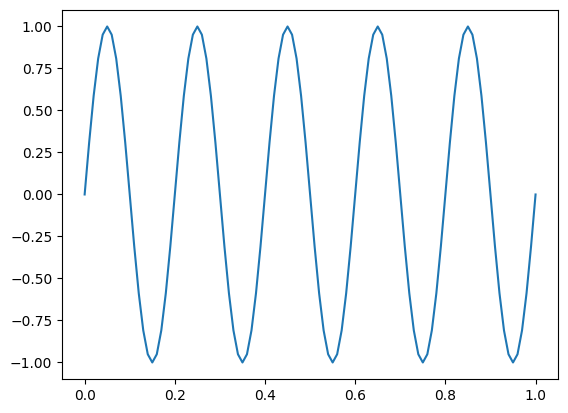

In [103]:
plt.plot(t,s);

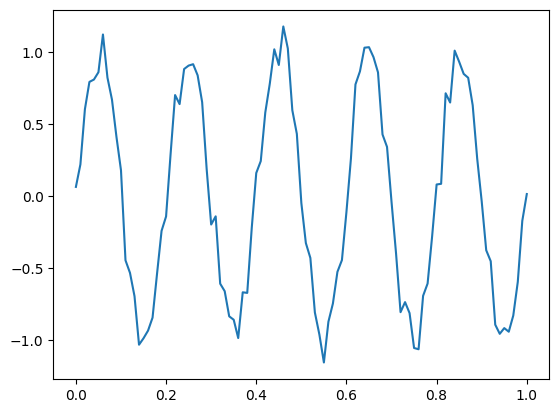

In [104]:
plt.plot(t,x);

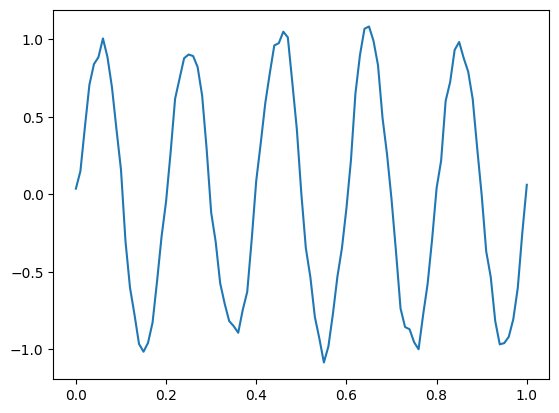

In [105]:
plt.plot(t,y);

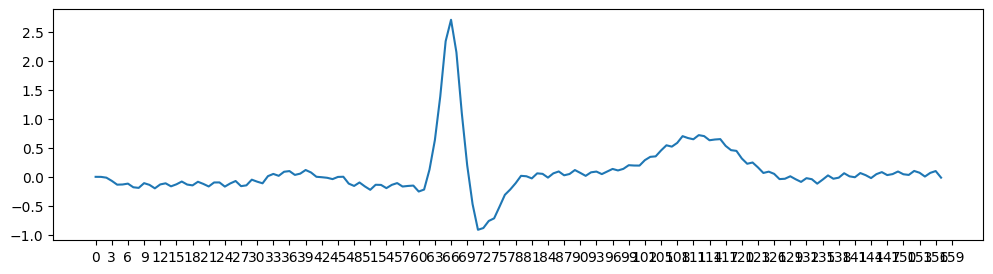

In [117]:
ecg = np.genfromtxt('ecg2x60.dat')
ecg = ecg[:158]
plt.figure(figsize=(12, 3)) 
plt.xticks(np.arange(0, len(ecg) + 3, 3)) 
plt.plot(ecg);

In [118]:
x = np.array([0, 10, 20, 30, 40, 45, 60, 65, 66, 70, 78, 85, 95, 102, 108, 117, 126, 135, 145, 157])
y = [ecg[i] for i in x]

In [119]:
y

[-3.3520598e-06,
 -0.13844322,
 -0.12197774,
 -0.083338871,
 0.075125593,
 -0.0017630635,
 -0.25346719,
 2.338042,
 2.7069908,
 -0.47019483,
 -0.1091655,
 0.060046549,
 0.092565563,
 0.2877882,
 0.5846028,
 0.53268278,
 0.051447959,
 -0.048924937,
 0.046645859,
 -0.01416565]

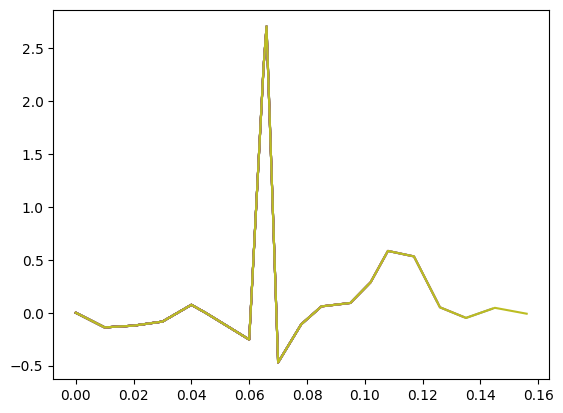

In [120]:
# Sample number
# x = np.array([0, 50, 75, 105, 130, 210, 215, 237, 268, 292, 395, 456, 498, 556, 700])

# Amplitude
# y = np.array([0, 0, 0.201075269, 0.201075269, 0, 0, -0.046236559, 1.305017921, -0.501433692, 0, 0, 0.598924731, 0.598924731, 0, 0])

# Generting pieceise linear ECG cycle
linModel = []

for i in range(len(x) - 1): #for number of piecewise segment
    if y[i + 1] == y[i]:    #for number of piecewise segments
        a = y[i] * np.ones(x[i + 1] - x[i]) # FOr replicating previous values
    else:
        a = y[i] + (y[i + 1] - y[i]) / (x[i + 1] - x[i]) * np.arange(x[i + 1] - x[i])
        #for non zero slope
    linModel.extend(a[:-1]) # discarding last reductant point

    linModel.append(a[-1])

    fs = 1000
    t1 = np.arange(len(linModel)) / fs

    plt.plot(t1,linModel)

In [121]:
len(linModel), len(ecg)

(157, 158)

In [122]:
Nh = 9  #Length of the filter
rxx =  np.correlate(linModel, linModel, mode = 'full')
rxx = rxx[Ns - 1 : Ns - 1 + Nh]

rxy = np.correlate(ecg, linModel, mode = 'full')
rxy = rxy[Ns - 1: Ns - 1 + Nh]

In [123]:
# Wiener Filter
Rxx = toeplitz(rxx)
Rxx_inv = np.linalg.inv(Rxx)

w1 = np.linalg.solve(Rxx, rxy)

In [124]:
y1 = lfilter(w1, 1, linModel)

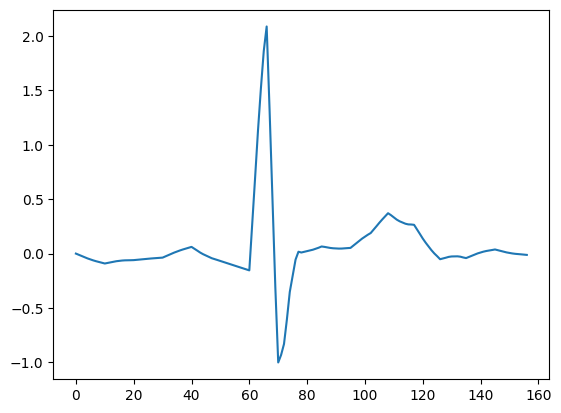

In [125]:
plt.plot(y1)